# Running stDiff on Starmap data

*   To run stDiff within the notebook, you will need to run the following:

In [ ]:
!python train_interpolate_starmap.py --data-file starmap.csv --epochs 300 --batch-size 16 --learning-rate 0.001 --output-file ./

*   After running the above cell, all the outputs fro different lambda values will be saved in the current directory.
*   The optimal lambda value which captures the spatial pattern of the target slice will be used for evaluation ( lambda = 0.7 for this dataset)

In [41]:
import anndata as ad
import pandas as pd
import squidpy as sq
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.sparse import issparse

In [42]:
adata =  ad.read_h5ad('./starmap.h5ad')

In [43]:
adata

AnnData object with n_obs × n_vars = 1207 × 1020
    obs: 'Total_counts', 'X', 'Y', 'label', 'mclust', 'domain'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ARI', 'hvg', 'label_colors', 'log1p'
    obsm: 'adj', 'emb', 'emb_pca', 'feat', 'graph_neigh', 'spatial'

In [44]:
layer2_interpolated = pd.read_csv('./stdiff_interpolated_lambda_0.7.csv')

*  extract the layer 2 from the starmap anndata object to use it a ground truth 

In [45]:
adatal2_3 = adata[adata.obs['label']== 'L2/3'].copy()

In [46]:
adatal2_3

AnnData object with n_obs × n_vars = 262 × 1020
    obs: 'Total_counts', 'X', 'Y', 'label', 'mclust', 'domain'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ARI', 'hvg', 'label_colors', 'log1p'
    obsm: 'adj', 'emb', 'emb_pca', 'feat', 'graph_neigh', 'spatial'

In [47]:
layer2_interpolated_adata = ad.AnnData(layer2_interpolated)

/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [48]:
layer2_interpolated_adata.obs = adatal2_3.obs.copy()
layer2_interpolated_adata.uns = adatal2_3.uns.copy()
layer2_interpolated_adata.obsm = adatal2_3.obsm.copy()
layer2_interpolated_adata.var = adatal2_3.var.copy()

* run leiden clustering on ground truth

/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


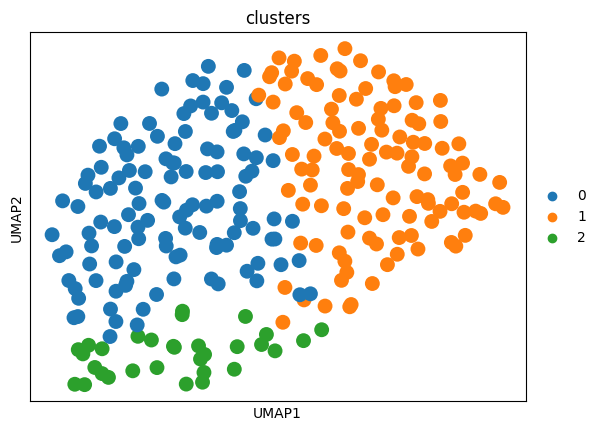

/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


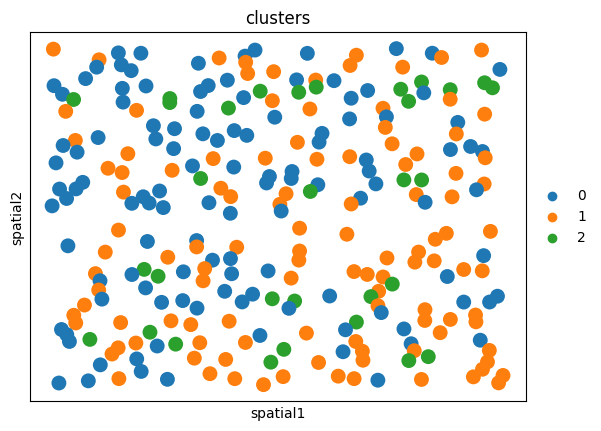

In [49]:
import scanpy as sc
sc.pp.normalize_total(adatal2_3, target_sum=1e4, inplace=True)
sc.pp.pca(adatal2_3 , n_comps=15)
sc.pp.neighbors(adatal2_3)
sc.tl.umap(adatal2_3)
sc.tl.leiden(adatal2_3 , key_added="clusters", resolution=0.5)
sc.pl.umap(adatal2_3, color="clusters")
sc.pl.embedding(adatal2_3, basis="spatial", color="clusters", cmap='plasma')

* run leiden clustering on interpolated data generated with stDiff

/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


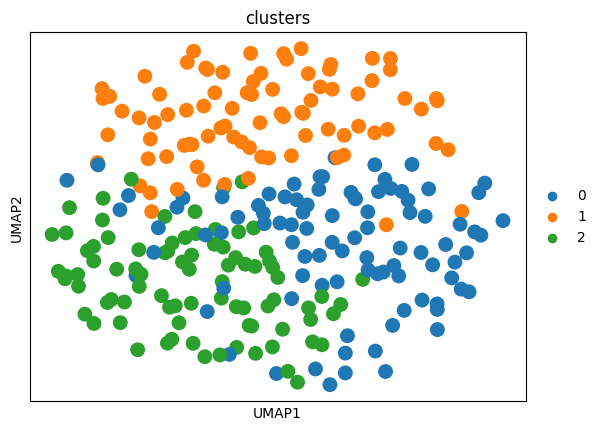

/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


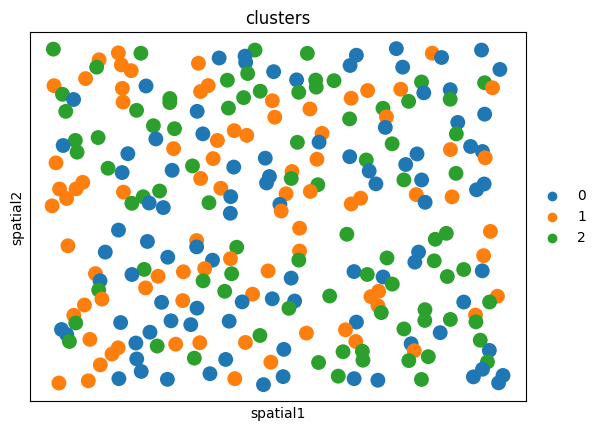

In [50]:
import scanpy as sc
sc.pp.normalize_total(layer2_interpolated_adata, target_sum=1e4, inplace=True)
sc.pp.pca(layer2_interpolated_adata , n_comps=15)
sc.pp.neighbors(layer2_interpolated_adata)
sc.tl.umap(layer2_interpolated_adata)
sc.tl.leiden(layer2_interpolated_adata , key_added="clusters", resolution=0.6)
sc.pl.umap(layer2_interpolated_adata, color="clusters")
sc.pl.embedding(layer2_interpolated_adata, basis="spatial", color="clusters", cmap='plasma')

* run neighborhood enrichment on clusters obtained from leiden clustering on ground truth

  0%|          | 0/1000 [00:00<?, ?/s]

/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/squidpy/pl/_utils.py:556: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


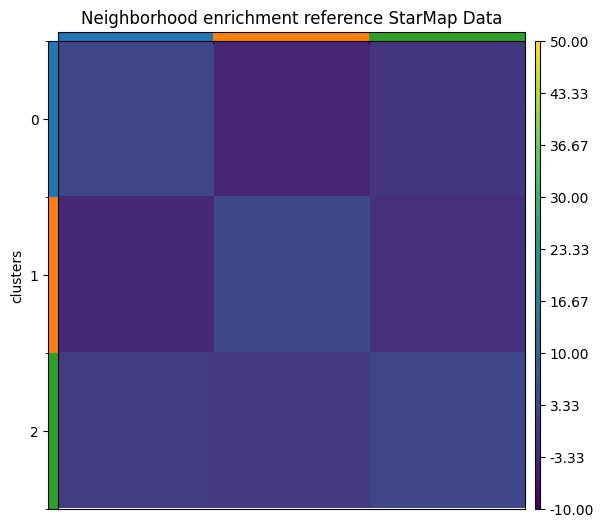

In [51]:
sq.gr.spatial_neighbors(adatal2_3, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(adatal2_3, cluster_key="clusters")
sq.pl.nhood_enrichment(
    adatal2_3,
    cluster_key="clusters",
    cmap="viridis",
    vmin=-10,
    vmax=50,
    figsize=(5, 5),
    title="Neighborhood enrichment reference StarMap Data"
)

* run neighborhood enrichment on clusters obtained from leiden clustering on interpolated data generated with stDiff

  0%|          | 0/1000 [00:00<?, ?/s]

/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/anaconda3/envs/Flows/lib/python3.11/site-packages/squidpy/pl/_utils.py:556: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


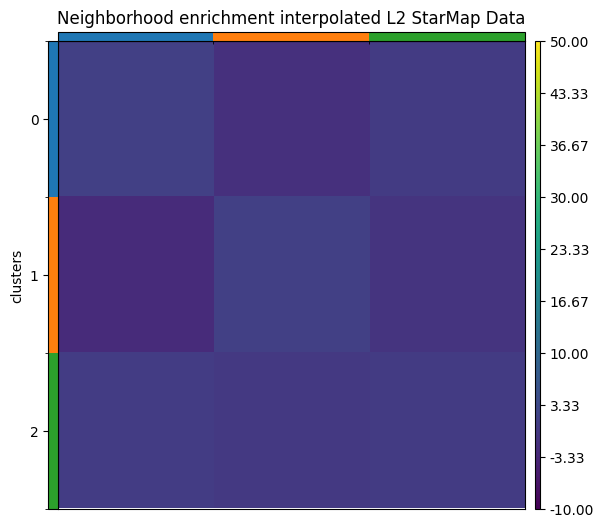

In [52]:
sq.gr.spatial_neighbors(layer2_interpolated_adata, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(layer2_interpolated_adata, cluster_key="clusters")
sq.pl.nhood_enrichment(
    layer2_interpolated_adata,
    cluster_key="clusters",
    cmap="viridis",
    vmin=-10,
    vmax=50,
    figsize=(5, 5),
    title="Neighborhood enrichment interpolated L2 StarMap Data"
)

* calculate the spearman correlation between the ground truth and interpolated data and plot along the spatial coordinates

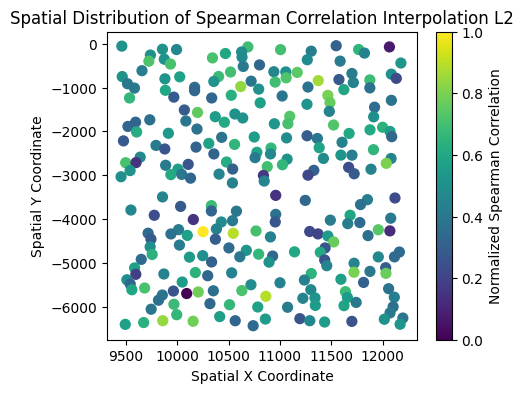

In [53]:
# Extract the expression matrices
ground_truth_expr = adatal2_3.X.toarray() if issparse(adatal2_3.X) else adatal2_3.X
interpolated_expr = layer2_interpolated_adata.X.toarray() if issparse(layer2_interpolated_adata.X) else layer2_interpolated_adata.X

# Calculate Spearman correlation for each spot
spearman_correlations_per_spot = [
    spearmanr(ground_truth_expr[i, :], interpolated_expr[i, :])[0]
    for i in range(ground_truth_expr.shape[0])
]

# Normalize the Spearman correlation values for color mapping
normalized_correlations = (np.array(spearman_correlations_per_spot) - np.min(spearman_correlations_per_spot)) / (np.max(spearman_correlations_per_spot) - np.min(spearman_correlations_per_spot))

average_normalized_correlation = np.mean(normalized_correlations)


# Extract spatial coordinates
ground_truth_coords = adatal2_3.obsm['spatial']

# Plot
plt.figure(figsize=(5, 4)) #$ 10, 8
sc = plt.scatter(ground_truth_coords[:, 0], ground_truth_coords[:, 1], c=normalized_correlations, cmap='viridis', s=50)
plt.colorbar(sc, label='Normalized Spearman Correlation')
plt.xlabel('Spatial X Coordinate')
plt.ylabel('Spatial Y Coordinate')
plt.title('Spatial Distribution of Spearman Correlation Interpolation L2')
plt.show()